In [4]:
"""
Notebook for logistic regression
"""

'\nNotebook for logistic regression\n'

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import copy
import math

In [6]:
train_data = pd.read_excel('../../data/preprocessed/train_data.xlsx')
cv_data = pd.read_excel('../../data/preprocessed/cv_data.xlsx')
test_data = pd.read_excel('../../data/preprocessed/test_data.xlsx')

In [7]:
# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
train_data = imputer.fit_transform(train_data)
cv_data = imputer.transform(cv_data)
test_data = imputer.transform(test_data)

In [8]:
# split into X and y
X_train = train_data[:, 1:]
y_train = train_data[:, 0]
X_cv = cv_data[:, 1:]
y_cv = cv_data[:, 0]
X_test = test_data[:, 1:]
y_test = test_data[:, 0]

In [9]:
def compute_cost_logistic(X, y, w, b):
    m = len(y)
    h_theta_x = 1 / (1 + np.exp(-(np.dot(X, w) + b)))
    cost = -np.sum(y * np.log(h_theta_x) + (1 - y) * np.log(1 - h_theta_x)) / m
    return cost

In [10]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def compute_gradient_logistic(X, y, w, b): 
    """
    Computes the gradient for logistic regression 
 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape
    dj_dw = np.zeros((n,))                           #(n,)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar
        
    return dj_db, dj_dw

In [11]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters, cost_threshold): 
    """
    Performs batch gradient descent
    
    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters  
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter 
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)   

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_cost_logistic(X, y, w, b) )

        # Print cost
        print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")

        # Check for convergence
        if i!= 0 and abs(J_history[i-1] - J_history[i]) < cost_threshold:
            print(f"Converged at iteration {i}. Change in cost: {abs(J_history[i-1] - J_history[i])}")
            break
        
    return w, b, J_history         #return final w,b and J history for graphing

In [12]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 1
iters = 10000
cost_threshold = 0.001

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters, cost_threshold) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.5631982531155912   
Iteration    1: Cost 0.4889821652087534   
Iteration    2: Cost 0.4448418165195707   
Iteration    3: Cost 0.4173401510710706   
Iteration    4: Cost 0.3994739437450503   
Iteration    5: Cost 0.38745365669543164   
Iteration    6: Cost 0.37913017802116894   
Iteration    7: Cost 0.3732284313326753   
Iteration    8: Cost 0.36896090887815275   
Iteration    9: Cost 0.3658240269162005   
Iteration   10: Cost 0.3634860093323348   
Iteration   11: Cost 0.36172260874619055   
Iteration   12: Cost 0.36037888690021175   
Iteration   13: Cost 0.35934574207421766   
Iteration   14: Cost 0.3585450742616799   
Converged at iteration 14. Change in cost: 0.0008006678125377364

updated parameters: w:[0.0130481  0.00676636 0.12957982], b:-1.816397546531555


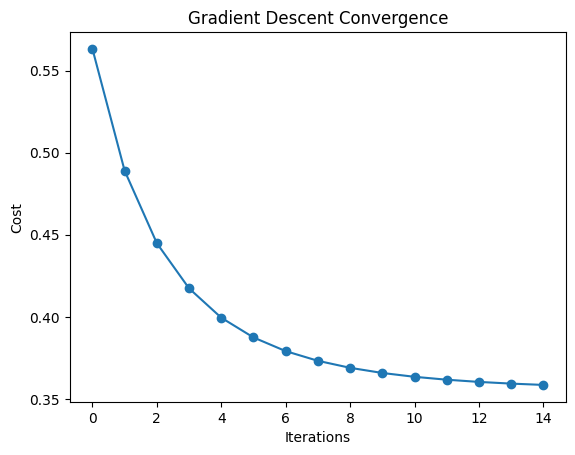

In [13]:
iteration_costs = [
    (0, 0.5631982531155912),
    (1, 0.4889821652087534),
    (2, 0.4448418165195707),
    (3, 0.4173401510710706),
    (4, 0.3994739437450503),
    (5, 0.38745365669543164),
    (6, 0.37913017802116894),
    (7, 0.3732284313326753),
    (8, 0.36896090887815275),
    (9, 0.3658240269162005),
    (10, 0.3634860093323348),
    (11, 0.36172260874619055),
    (12, 0.36037888690021175),
    (13, 0.35934574207421766),
    (14, 0.3585450742616799)
]

# Extract iteration numbers and cost values
iteration_numbers, cost_values = zip(*iteration_costs)

# Plot
plt.plot(iteration_numbers, cost_values, marker='o')
plt.title('Gradient Descent Convergence')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()


In [14]:
# Evaluate performance on cv and test data
# Create predictions for cv and test data
def predict(X, w, b):
    """
    Predicts the class for each data point in X

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
    Returns
      ndarray (m,): The predicted class for each example
    """
    m = X.shape[0]
    y_pred = np.zeros((m,))
    for i in range(m):
        y_pred[i] = 1 if sigmoid(np.dot(X[i], w) + b) >= 0.5 else 0
    return y_pred


In [16]:
# Compare predictions with ground truth to compute accuracy
def accuracy(y_true, y_pred):
    """
    Computes the accuracy of the predictions

    Args:
      y_true (ndarray (m,)): The true class labels
      y_pred (ndarray (m,)): The predicted class labels
    Returns
      float: The accuracy
    """
    return np.sum(y_true == y_pred) / len(y_true)


In [18]:
# Calculate accuracy on train, cv and test data
y_train_pred = predict(X_train, w_out, b_out)
y_cv_pred = predict(X_cv, w_out, b_out)
y_test_pred = predict(X_test, w_out, b_out)
print(f"Accuracy on train data: {accuracy(y_train, y_train_pred):.2%}")
print(f"Accuracy on cv data: {accuracy(y_cv, y_cv_pred):.2%}")
print(f"Accuracy on test data: {accuracy(y_test, y_test_pred):.2%}")

Accuracy on train data: 88.47%
Accuracy on cv data: 89.11%
Accuracy on test data: 88.61%


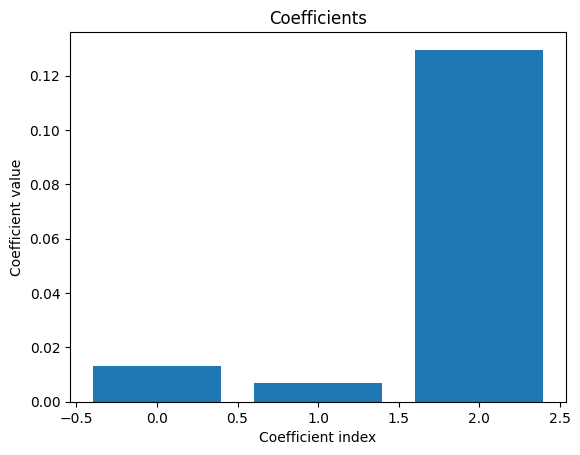

In [19]:
# Plot the coefficients
plt.bar(range(len(w_out)), w_out)
plt.title('Coefficients')
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient value')
plt.show()